**HARN Explanation:**

In essence, Hyperdimensional Adaptive Resonance Network (HARN) combines adaptive resonance theory (ART) with hyperdimensional computing to build systems that can efficiently learn, store, and recognize patterns in a noise-resistant, adaptable, and scalable manner. It addresses key issues like catastrophic forgetting, memory capacity, and noise robustness, making it useful in a range of complex, real-time, and incremental learning tasks.

Hyperdimensional Adaptive Resonance Network (HARN) is a relatively advanced concept in the field of machine learning and neural networks. It combines principles from adaptive resonance theory (ART) and hyperdimensional computing to create a more robust and flexible framework for tasks like pattern recognition, anomaly detection, and memory storage

    Data Generation:
        We use make_blobs from sklearn.datasets to generate synthetic 2D data with 3 centers (clusters). These data points will serve as the "patterns" that the ART network will learn to recognize.

    Hyperdimensional Encoding:
        In the encode_in_high_dimension function, we simulate a simple form of high-dimensional encoding. Each 2D data point is converted into a vector in a much higher-dimensional space (1,000 dimensions in this case). The idea is that in hyperdimensional computing, high-dimensional spaces provide rich encoding and better noise tolerance.

    ART Network:
        The ARTNetwork class implements a basic version of Adaptive Resonance Theory (ART). The network stores pattern prototypes (clusters) and uses a resonance check (similarity check using cosine similarity) to decide if a new pattern should update an existing prototype or create a new one.

    Pattern Matching & Update:
        When a new encoded data point is presented, the network compares it to existing prototypes. If the similarity exceeds a threshold, the pattern is considered a match, and the prototype is updated. If no match is found, the pattern is stored as a new prototype.

    Visualization:
        The input data is plotted along with the prototypes (centroids) that the ART network has learned. Red "X" marks indicate the learned prototypes. These represent the centers of the clusters recognized by the ART network.

Results and Expected Behavior:

    The ART network will group similar data points into clusters and try to match them to the learned prototypes.
    The visualization will show how the network has identified the 3 clusters and marked their centroids as learned prototypes.
    The red "X" markers represent the learned centers of the patterns by the ART network.

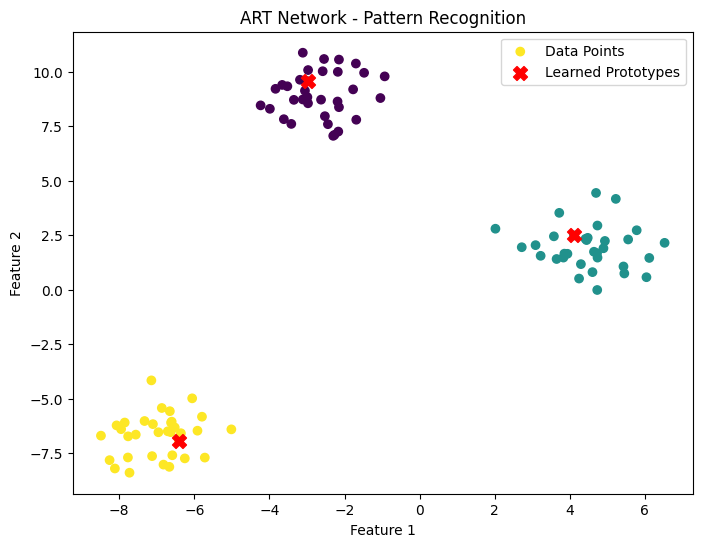

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Function to generate high-dimensional vectors using random encoding
def generate_hyperdimensional_vector(dim=1000):
    """Generate a random high-dimensional vector of given dimension"""
    return np.random.choice([-1, 1], size=dim)

# Function to encode the data in high-dimensional space
def encode_in_high_dimension(data, dim=1000):
    """Encode each data point as a high-dimensional vector"""
    encoded_data = []
    for point in data:
        # Simple encoding: Convert each data point into a vector of high dimension
        encoded_vector = np.zeros(dim)
        for i, value in enumerate(point):
            encoded_vector[i % dim] = value
        encoded_data.append(encoded_vector)
    return np.array(encoded_data)

# ART-like cluster creation with resonance check
class ARTNetwork:
    def __init__(self, dim=1000, threshold=0.7):
        self.dim = dim
        self.threshold = threshold
        self.memory = []  # Store clusters (pattern prototypes)

    def match(self, vector):
        """Check if the vector matches any existing cluster (prototype)"""
        best_match = None
        best_similarity = 0

        for prototype in self.memory:
            # Compute cosine similarity between input vector and prototype
            similarity = np.dot(vector, prototype) / (np.linalg.norm(vector) * np.linalg.norm(prototype))
            if similarity > self.threshold and similarity > best_similarity:
                best_similarity = similarity
                best_match = prototype

        return best_match, best_similarity

    def add_pattern(self, vector):
        """Add a new pattern to the memory (or update existing one if similar enough)"""
        matched_pattern, similarity = self.match(vector)
        if matched_pattern is None:
            # No match found, add new prototype
            self.memory.append(vector)
        else:
            # Update existing prototype (simple averaging)
            # Find the index by checking similarity, but no need for `index()` method
            self.memory = [((pattern + vector) / 2) if np.array_equal(pattern, matched_pattern) else pattern for pattern in self.memory]

# Create synthetic data for demo purposes (2D)
data, labels = make_blobs(n_samples=100, centers=3, random_state=42)

# Encode the 2D data into high-dimensional vectors
dim = 1000
encoded_data = encode_in_high_dimension(data, dim=dim)

# Initialize ART network
art_net = ARTNetwork(dim=dim, threshold=0.8)

# Train ART network with the encoded data
for vector in encoded_data:
    art_net.add_pattern(vector)

# Plotting the results to visualize the clusters
plt.figure(figsize=(8, 6))

# Plot the input data
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', label='Data Points')

# Mark the centroids (prototypes) learned by ART
# We need to match prototypes (high-dimensional vectors) to 2D data points

prototypes_2d = []
for pattern in art_net.memory:
    # Find the closest data point by comparing cosine similarity
    best_match_idx = np.argmax([np.dot(pattern, enc_vector) / (np.linalg.norm(pattern) * np.linalg.norm(enc_vector)) for enc_vector in encoded_data])
    prototypes_2d.append(data[best_match_idx])

prototypes_2d = np.array(prototypes_2d)

plt.scatter(prototypes_2d[:, 0], prototypes_2d[:, 1], color='red', marker='X', s=100, label='Learned Prototypes')

plt.title('ART Network - Pattern Recognition')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


# ***Code generated by ChatGPT, executed by Bhadale IT***